In [2]:
import numpy as np
from astropy.modeling import models, fitting
import matplotlib.pyplot as plt

def fit_rotated_2d_gaussian(data, x=None, y=None, plot_result=False):
    """
    Fit a rotated 2D Gaussian to 2D data using Astropy's Gaussian2D model.

    Parameters:
        data : 2D numpy array
            The input data array to fit.
        x, y : 2D numpy arrays, optional
            Meshgrid coordinates corresponding to data. If None, will be auto-generated.
        plot_result : bool
            Whether to plot the original data and fit result.

    Returns:
        fitted_model : Gaussian2D
            The best-fit Gaussian2D model.
    """
    # Generate coordinate grids if not provided
    ny, nx = data.shape
    if x is None or y is None:
        y, x = np.mgrid[:ny, :nx]

    # Estimate initial parameters
    amplitude_init = np.max(data)
    x_mean_init = x[data == amplitude_init][0]
    y_mean_init = y[data == amplitude_init][0]

    # Initial guess for model
    gauss_init = models.Gaussian2D(amplitude=amplitude_init, x_mean=x_mean_init,
                                   y_mean=y_mean_init, x_stddev=5, y_stddev=5, theta=0)

    # Fitting with Levenberg-Marquardt algorithm
    fitter = fitting.LevMarLSQFitter()
    fitted_model = fitter(gauss_init, x, y, data)

    if plot_result:
        fit_data = fitted_model(x, y)
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(data, origin='lower', cmap='viridis')
        axes[0].set_title("Original Data")
        axes[1].imshow(fit_data, origin='lower', cmap='viridis')
        axes[1].set_title("Fitted Gaussian")
        plt.tight_layout()
        plt.show()

    return fitted_model

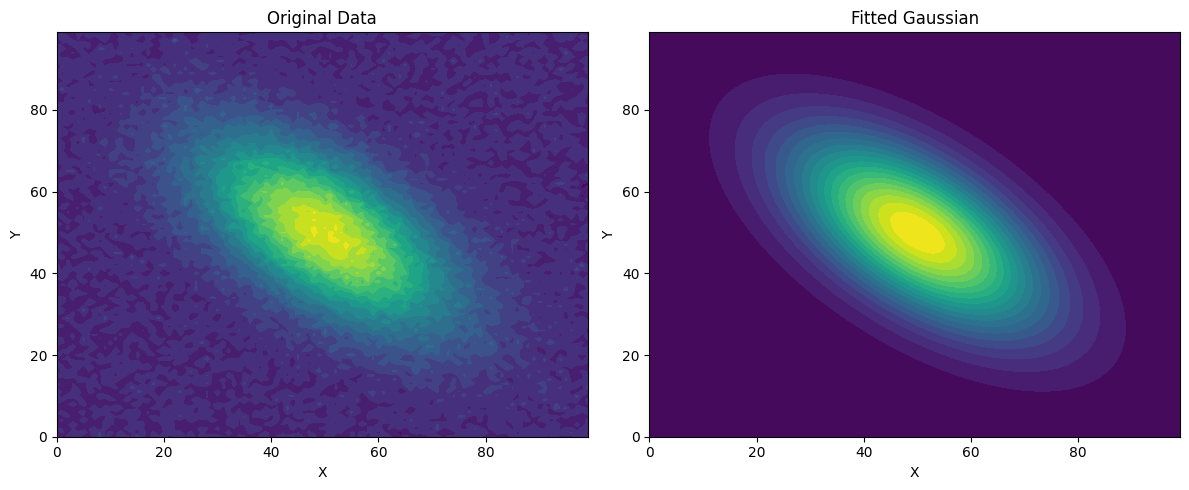

Amplitude: 2.9974084735823423
x_mean: 50.02285851993248
y_mean: 49.957707069810645
x_stddev: 20.057312218784514
y_stddev: 10.008957125766353
theta (radians): 55.76281874063168


In [ ]:
def generate_rotated_gaussian_data():
    y, x = np.mgrid[0:100, 0:100]
    model = models.Gaussian2D(amplitude=3, x_mean=50, y_mean=50,
                              x_stddev=10, y_stddev=20, theta=np.pi/4)
    data = model(x, y) + 0.1 * np.random.normal(size=x.shape)
    return data, x, y

data, x, y = generate_rotated_gaussian_data()
fitted = fit_rotated_2d_gaussian(data, x, y, plot_result=True)

# Print the fitted parameters
print(f"Amplitude: {fitted.amplitude.value}")
print(f"x_mean: {fitted.x_mean.value}")
print(f"y_mean: {fitted.y_mean.value}")
print(f"x_stddev: {fitted.x_stddev.value}")
print(f"y_stddev: {fitted.y_stddev.value}")
print(f"theta (radians): {fitted.theta.value}")

In [4]:
def fit_rotated_2d_gaussian(data, x=None, y=None, plot_result=False):
    """
    Fit a rotated 2D Gaussian to 2D data using Astropy's Gaussian2D model.

    Parameters:
        data : 2D numpy array
            The input data array to fit.
        x, y : 2D numpy arrays, optional
            Meshgrid coordinates corresponding to data. If None, will be auto-generated.
        plot_result : bool
            Whether to plot the original data and fit result using contourf.

    Returns:
        fitted_model : Gaussian2D
            The best-fit Gaussian2D model.
    """
    # Generate coordinate grids if not provided
    ny, nx = data.shape
    if x is None or y is None:
        y, x = np.mgrid[:ny, :nx]

    # Estimate initial parameters
    amplitude_init = np.max(data)
    x_mean_init = x[data == amplitude_init][0]
    y_mean_init = y[data == amplitude_init][0]

    # Initial guess for model
    gauss_init = models.Gaussian2D(amplitude=amplitude_init, x_mean=x_mean_init,
                                   y_mean=y_mean_init, x_stddev=5, y_stddev=5, theta=0)

    # Fitting with Levenberg-Marquardt algorithm
    fitter = fitting.LevMarLSQFitter()
    fitted_model = fitter(gauss_init, x, y, data)

    if plot_result:
        fit_data = fitted_model(x, y)
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        contour_levels = 20  # number of contour levels

        axes[0].contourf(x, y, data, levels=contour_levels, cmap='viridis')
        axes[0].set_title("Original Data")
        axes[0].set_xlabel("X")
        axes[0].set_ylabel("Y")

        axes[1].contourf(x, y, fit_data, levels=contour_levels, cmap='viridis')
        axes[1].set_title("Fitted Gaussian")
        axes[1].set_xlabel("X")
        axes[1].set_ylabel("Y")

        plt.tight_layout()
        plt.show()

    return fitted_model